In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [2]:
postings_data = pd.read_csv('../data/Lightcast, UK Postings Sample.csv', low_memory=False)
postings_data.columns

Index([' ', 'POSTED', 'TITLE_NAME', 'SOC_4', 'SOC_4_NAME', 'SOC_3',
       'SOC_3_NAME', 'SOC_2', 'SOC_2_NAME', 'LOT_OCCUPATION_NAME',
       'LOT_CAREER_AREA_NAME', 'CITY_NAME', 'NUTS1_NAME', 'NUTS3_NAME',
       'TTWA_NAME', 'COUNTRY_NAME', 'COMPANY_NAME', 'COMPANY_IS_STAFFING',
       'UK_SIC_2', 'INDUSTRY', 'IS_INTERNSHIP', 'IS_REMOTE',
       'SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME', 'SOFTWARE_SKILLS_NAME',
       'CERTIFICATIONS_NAME', 'EDULEVELS_NAME_MIN', 'SALARY',
       'JOB_DESCRIPTION'],
      dtype='object')

In [ ]:
# Reformat data type of columnns 

for sk in ['SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME','SOFTWARE_SKILLS_NAME' ]:
    postings_data[sk] = postings_data[sk].astype(str)

postings_data['POSTED'] = pd.to_datetime(postings_data['POSTED'])
postings_data['JOB_DESCRIPTION'] = postings_data['JOB_DESCRIPTION'].str.lower()

N_jobs, N_attr = postings_data.shape
print('fraction of jobs without degree requirement: ', postings_data['EDULEVELS_NAME_MIN'].isnull().sum()/N_jobs)

<AxesSubplot:ylabel='SOC_2_NAME'>

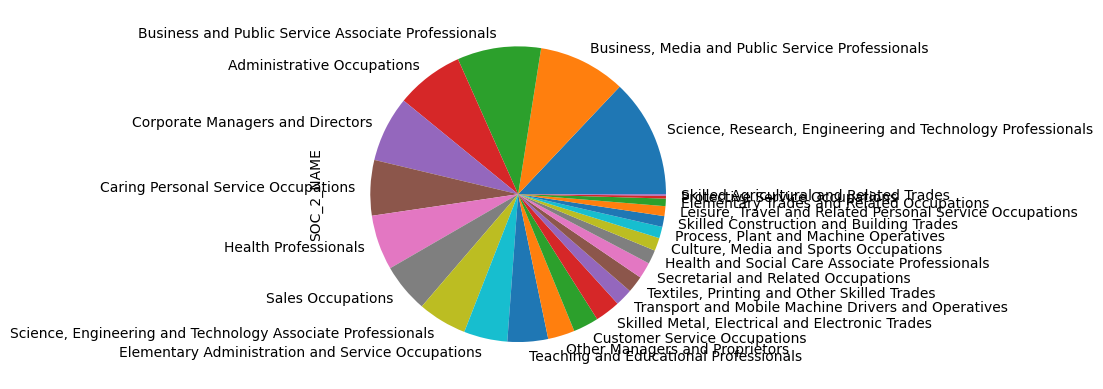

In [15]:
postings_data['SOC_2_NAME'].value_counts().plot(kind='pie')

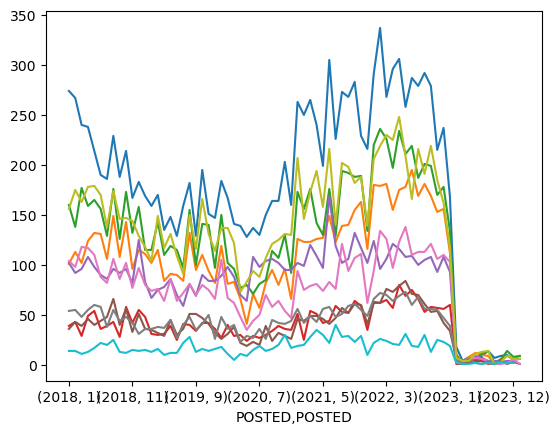

In [64]:
names = postings_data['SOC_2_NAME'].unique()

# Plot most common SOC2 names over time
fig, ax = plt.subplots()
for i in names[0:10]:
    temp_df = postings_data[postings_data['SOC_2_NAME'] == i]
    temp_df['SOC_2_NAME'].groupby([temp_df['POSTED'].dt.year, temp_df['POSTED'].dt.month]).count().plot()
# ax.legend(names[0:10])

In [58]:
# Calc SOC2 growths as total of overall growth
freqtab = pd.crosstab(postings_data['SOC_2_NAME'],pd.PeriodIndex(postings_data['POSTED'],freq='M'))
freqtab.head()

col_0,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
SOC_2_NAME,,,,,,,,,,,,,,,,,,,,,
Administrative Occupations,101,113,102,124,132,131,106,149,108,143,...,1,8,12,10,9,1,6,9,6,9
Business and Public Service Associate Professionals,160,138,177,159,165,156,129,176,126,173,...,3,5,6,11,14,3,5,14,8,9
"Business, Media and Public Service Professionals",156,175,163,178,179,170,138,174,146,147,...,4,4,11,13,14,1,3,9,6,6
Caring Personal Service Occupations,70,70,81,90,82,64,50,69,77,84,...,5,5,18,9,10,4,3,6,14,4
Corporate Managers and Directors,117,164,129,140,108,102,86,113,99,120,...,1,6,6,9,6,3,0,3,3,8


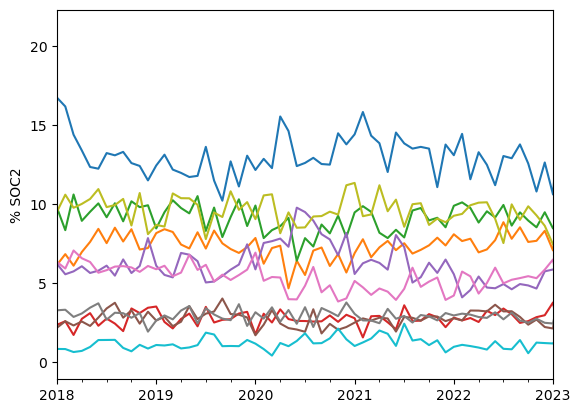

In [76]:
totals = freqtab.sum()
for i in names[0:10]:
    perc = np.divide(freqtab.loc[i],totals)*100
    # print(perc)
    perc.plot(xlabel='',ylabel='% SOC2',xlim=['1/1/2018','1/1/2023'])

In [70]:
len(names)

26